In [1]:
import numpy as np                                       # fast vectors and matrices
import matplotlib.pyplot as plt                          # plotting
from scipy import fft, ifft, fftpack

from IPython.display import Audio
from intervaltree import Interval,IntervalTree

from helperfunction import Waveform, reconstruct_waveform

%matplotlib inline

In [2]:
data = np.load('./numpy_version/musicnet.npz', encoding='bytes')

# split our dataset into train and test
test_data = ['2303','2382','1819']
train_data = [f for f in data.files if f not in test_data] # Getting only the index

In [3]:
fs = 44100            # samples/second
window_size = 2048    # fourier window size
d = 1024              # number of features
m = 128               # number of distinct notes
stride = 512          # samples between windows
wps = fs/float(512)   # windows/second
n = 1000              # training data points per recording

In [4]:
X,Y = data['1788']

In [27]:
mydata = Waveform(X,window_size, stride, 2)

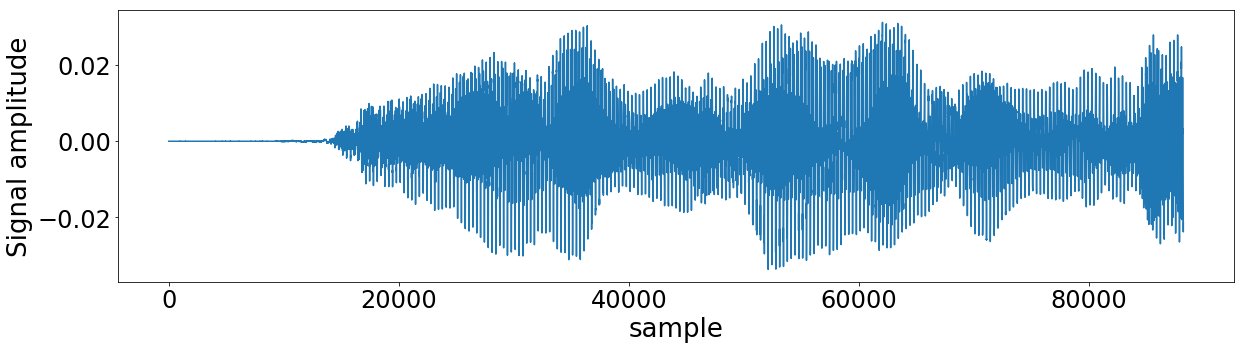

In [28]:
mydata.show_waveform()

In [29]:
mydata.play_audio()

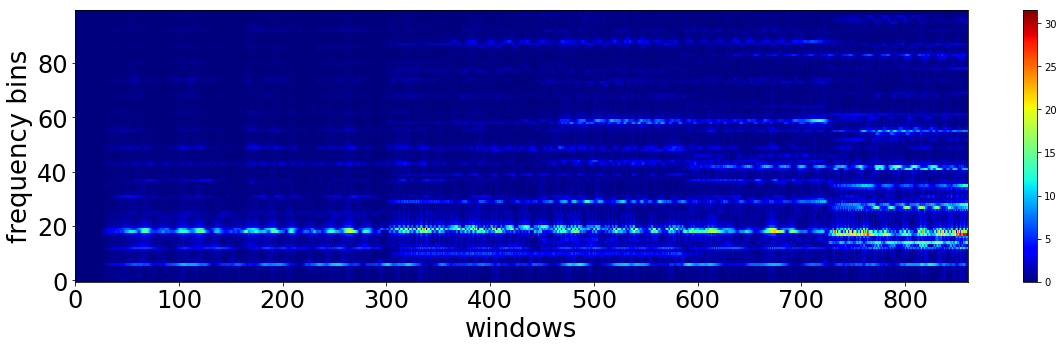

In [26]:
mydata.show_spectrogram(frequency_range=(0,100))

# Reconstructing audio from frequency domain

In [9]:
Xfft = mydata.get_Xfft()

In [10]:
recont = reconstruct_waveform(Xfft, window_size, stride)

In [16]:
Audio(recont,rate=fs)

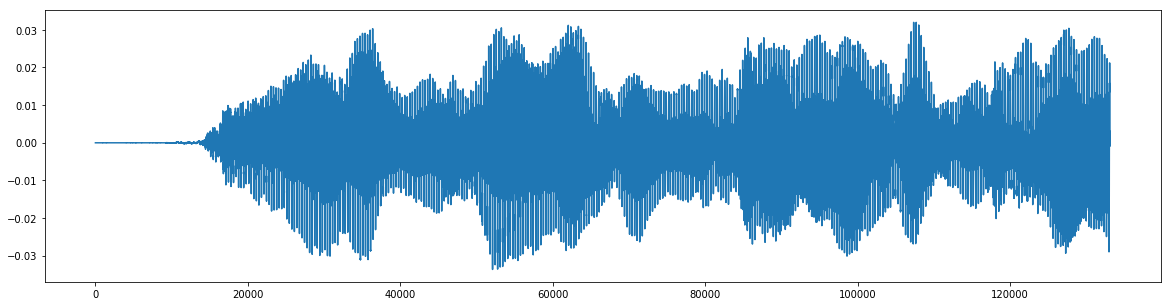

In [12]:
plt.figure(figsize=(20,5))
fig = plt.plot(recont)

In [13]:
recont.shape

(133120,)

In [14]:
mydata.get_waveform().shape

(132300,)

In [15]:
np.allclose(mydata.get_waveform(), recont[:132300])

True